In [1]:
]activate ../

In [2]:
using Revise
using Spot

┌ Info: Recompiling stale cache file /mnt/c/Users/Maxime/wsl/.julia/compiled/v1.0/Spot/dk13t.ji for Spot [f11abc24-ce50-11e8-2475-af6658d13f2b]
└ @ Base loading.jl:1184


In [27]:
ltl = "(a U b) & GFc & GFd"

translator = LTLTranslator(deterministic=true, buchi=true, state_based_acceptance=true)

a = translate(translator, ltl)

┌ Warning: error processing module Spot signature expressions Expr[:(Tuple{(Typeof)(get_rabin_acceptance), SpotAutomata})] from :(function get_rabin_acceptance(aut::SpotAutomata)
│       acc = (aut.a[:acc])()
│       (israbin, acc_sets) = (acc[:is_rabin_like])()
│       if israbin
│           nothing
│       else
│           (Base.throw)((Base.AssertionError)("SpotError: automata is not Rabin like"))
│       end
│       fin_inf_sets = Vector{Tuple{Set{Int64}, Set{Int64}}}(undef, length(acc_sets))
│       for (i, s) = enumerate(acc_sets)
│           infset = Set(collect(((s[:inf])[:sets])()))
│           finset = Set(collect(((s[:fin])[:sets])()))
│           fin_inf_sets[i] = (finset, infset)
│       end
│       return fin_inf_sets
│   end)
└ @ Revise /mnt/c/Users/Maxime/wsl/.julia/packages/Revise/TmjcT/src/exprutils.jl:94


UndefVarError: UndefVarError: get_rabin_acceptance not defined

In [6]:
acc = a[:acc]()
(b, v) = acc[:is_rabin_like]()

2-element Array{Any,1}:
 true                                         
     (PyObject spot.rs_pair(fin=[], inf=[0]),)

In [18]:
v[1][:inf]

PyObject spot.mark_t([0])

In [14]:
fin = spot.mark_t((0, 2, 3))
for s in fin[:sets]()
    println(s)
end

0
2
3


In [24]:
function get_rabin_acceptance(aut::SpotAutomata)
    acc = aut.a[:acc]()
    israbin, acc_sets = acc[:is_rabin_like]()
    @assert israbin "SpotError: automata is not Rabin like"
    fin_inf_sets = Vector{Tuple{Set{Int64}, Set{Int64}}}(undef, length(acc_sets))
    for (i,s) in enumerate(acc_sets)
        infset = Set(collect(s[:inf][:sets]()))
        finset = Set(collect(s[:fin][:sets]()))
        fin_inf_sets[i] = (finset, infset)
    end
    return fin_inf_sets
end

get_rabin_acceptance (generic function with 1 method)

In [26]:
s = get_rabin_acceptance(SpotAutomata(a))

1-element Array{Tuple{Set{Int64},Set{Int64}},1}:
 (Set([]), Set([0]))

In [4]:
println("a num edges: ", a[:num_edges]())
a2 = spot.split_edges(a)
a2[:num_edges]()

a num edges: 21


76

In [5]:
aut = SpotAutomata(a2)
aps = atomic_propositions(aut)
A = zeros(2^length(aps))
edges, labels = get_edges_labels(aut)
i=0
for e in edges
    global i 
    if e[1] == 1
        i += 1
    end
end
println(i)

12


In [23]:
l = labels[10]
l.f[3]

PyObject spot.formula("!c")

In [22]:
a2;

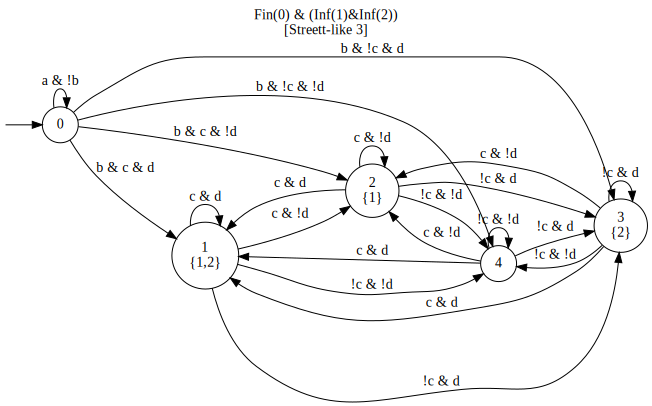

In [34]:
dra = spot.to_generalized_rabin(a)
dra[:show]()

In [36]:
dra = spot.to_generalized_rabin(a)
acc = dra[:get_acceptance]()
acc = dra[:acc]()
b, v = acc[:is_rabin_like]()
println(acc)
print(b, v)

PyObject spot.acc_cond(3, "Fin(0) & (Inf(1)&Inf(2))")
false()

In [30]:
dpa = spot.translate("GF a -> GFb", "parity min odd", "det")
dra = spot.to_generalized_rabin(dpa)
acc = dra[:acc]()
b, v = acc[:is_rabin_like]()

2-element Array{Any,1}:
 true                                                                                  
     (PyObject spot.rs_pair(fin=[0], inf=[1]), PyObject spot.rs_pair(fin=[2], inf=[3]))

In [14]:
println(" Deterministic: ",a[:is_deterministic]())
acc = a[:acc]()
println(" Rabin like ", acc[:is_rabin_like]())
dra = spot.to_generalized_rabin(a)
dra[:show]()
dra_acc = dra[:acc]()
println(" Rabin like ", dra_acc[:is_rabin_like]())

 Deterministic: true
 Rabin like Any[false, ()]
 Rabin like Any[false, ()]


In [17]:
dra_acc[:is_rabin_like]()

2-element Array{Any,1}:
 false  
      ()

In [ ]:
split_a = spot.